In [1]:
import pandas as pd
import yfinance as yf

In [2]:
df = yf.download('^GSPC', start='2015-01-01')

[*********************100%%**********************]  1 of 1 completed


In [4]:
df['M100'] = df.Close.rolling(100).mean()

In [5]:
df.dropna(inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,M100
Date,,,,,,,
2015-05-27,2105.129883,2126.219971,2105.129883,2123.479980,2123.479980,3127960000,2078.878900
2015-05-28,2122.270020,2122.270020,2112.860107,2120.790039,2120.790039,2980350000,2079.504801
2015-05-29,2120.659912,2120.659912,2104.889893,2107.389893,2107.389893,3927390000,2080.372900
2015-06-01,2108.639893,2119.149902,2102.540039,2111.729980,2111.729980,3011710000,2081.464100
2015-06-02,2110.409912,2117.590088,2099.139893,2109.600098,2109.600098,3049350000,2082.301101
...,...,...,...,...,...,...,...
2023-11-16,4497.080078,4511.990234,4487.830078,4508.240234,4508.240234,3964520000,4407.352393
2023-11-17,4509.549805,4520.120117,4499.660156,4514.020020,4514.020020,3777240000,4408.723994
2023-11-20,4511.700195,4557.109863,4510.359863,4547.379883,4547.379883,3644790000,4410.233394


<Axes: xlabel='Date'>

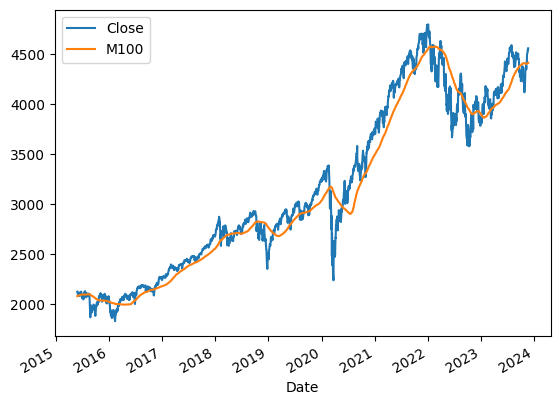

In [7]:
df[['Close', 'M100']].plot()

In [8]:
# shift the open one day back
df['buy price'] = df.Open.shift(-1)

In [14]:
buy_prices, sell_prices = [], []

in_position = False

for index, row in df.iterrows():
    if not in_position and row.Close > row.M100:
        buy_prices.append(row['buy price'])
        in_position = True
    if in_position and row.Close < row.M100:
        sell_prices.append(row['buy price'])
        in_position = False
        
# mark to market adjustment
# get current value of position when doing a benchmark
if in_position:
    sell_prices.append(row.Close)

In [15]:
trades = pd.DataFrame({'buys': buy_prices, 'sells': sell_prices})

In [20]:
# absolute profit
trades['profit'] = (trades.sells - trades.buys)
# relative profit
trades['rel profit'] = (trades.sells - trades.buys) / trades.buys

In [21]:
(trades['rel profit'] + 1).prod() - 1

0.39296865916193147

<Axes: >

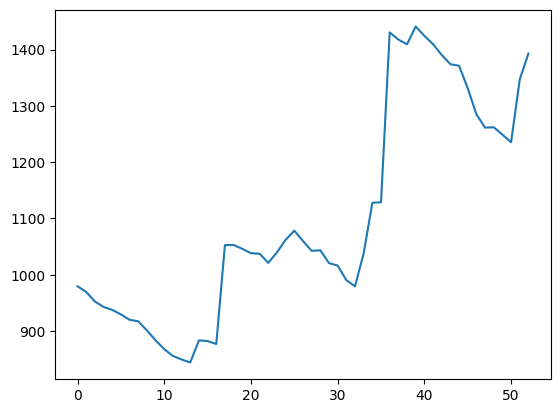

In [22]:
(1000 * (trades['rel profit'] + 1).cumprod()).plot()